In [103]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import Derivative,sin,cos
from scipy.optimize import fsolve
plt.style.use('ggplot')
x = sp.symbols('x')
y = sp.symbols('y')

## Euler

In [104]:
def euler(x0,y0,function,h,n):
    
    f = sp.lambdify((x,y), function, 'numpy')
    print('x0 =',x0, '','y0 =',y0)
    x_z = np.zeros(n+1)
    y_z = np.zeros(n+1)
    x_z[0] = x0
    y_z[0] = y0
    
    for i in range(1,n+1): 
        X = x0 + h        
        Y = y0 + h*f(x0,y0)
        x0 = X
        y0 = Y
        x_z[i]=X
        y_z[i]=Y
        
        print('x' + str(i) + '=',round(X,6),'', 'y' + str(i) + '=', round(Y,6))

    return x_z,y_z

## Heun

In [105]:
def heun(x0,y0,function,h,n):
    f = sp.lambdify((x,y), function, 'numpy')
    x_z = np.zeros(n+1)
    y_z = np.zeros(n+1)
    x_z[0] = x0
    y_z[0] = y0
    
    for i in range(1,n+1):
        Slope_left = f(x0,y0)
        slope_right = f(x0+h,y0+h*Slope_left)
        x0 = x0+h
        y0 = y0 + (h/2)*(Slope_left+slope_right)
        x_z[i]=x0
        y_z[i]=y0
        print('x' + str(i) + '=',round(x0,6),'', 'y' + str(i) + '=', round(y0,6))

    return x_z,y_z

## RK

In [106]:
def rungekutta(x0,y0,function,h,n):
    f = sp.lambdify((x,y), function, 'numpy')
    print('x0 =',x0, '','y0 =',y0)
    x_z = np.zeros(n+1)
    y_z = np.zeros(n+1)
    x_z[0] = x0
    y_z[0] = y0

    for i in range(1,n+1):
        k_0 = f(x0, y0)
        k_1 = f(x0 + h/2, y0 + h/2 * k_0)
        k_2 = f(x0 + h/2, y0 + h/2 * k_1)
        k_3 = f(x0 + h, y0 + h * k_2)
        k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)
        x_1 = x0 + h
        y_1 = y0 + h * k
        x_z[i]=x_1
        y_z[i]=y_1
        x0 =x_1
        y0 =y_1
        print('x' + str(i) + '=',round(x0,6),'', 'y' + str(i) + '=', round(y0,6))
    return x_z,y_z

## Taylor

In [107]:
def Taylor(x0,y0,function,h,n):
    f = sp.lambdify((x,y), function, 'numpy')
    print('x0 =',x0, '','y0 =',y0)
    x_z = np.zeros(n+1)
    y_z = np.zeros(n+1)
    x_z[0] = x0
    y_z[0] = y0
    function_d1 = Derivative(function,x).doit()
    f1=sp.lambdify((x,y),function_d1,'numpy')
    function_d2 = Derivative(function_d1,x).doit()
    f2 = sp.lambdify((x,y),function_d2,'numpy')
    for i in range(1,n+1):
        s1 = f(x0,y0)
        s2= f1(x0,y0) 
        s3 = f2(x0,y0) 
        t1 = h * s1
        t2 = ((h**2)/2) * s2 *s1
        t3 = ((h**3)/6) * ((s3 * (s2**2)) + ((s2**2) * s1))
        x0 = x0+h
        y0 = y0 + t1 + t2 + t3
        x_z[i]=x0
        y_z[i]=y0
        print('x' + str(i) + '=',round(x0,6),'', 'y' + str(i) + '=', round(y0,6))
    return x_z,y_z

## midpoint

In [108]:
def midpoint(x0,y0,function,h,n):
    f = sp.lambdify((x,y), function, 'numpy')
    x_z = np.zeros(n+1)
    y_z = np.zeros(n+1)
    x_z[0] = x0
    y_z[0] = y0
    for i in range(1,n+1):
        y0 = y0 + h*f( x0+(h/2) +(h/2)*f(x0,y0),y0)
        x0 = x0+h
        x_z[i] = x0
        y_z[i] = y0
        print('x' + str(i) + '=',round(x0,6),'', 'y' + str(i) + '=', round(y0,6))
    return x_z,y_z

## Adam 

In [109]:
def adam(x0,y0,function,h,n):
    f = sp.lambdify((x,y), function, 'numpy')
    print('x0 =',x0, '','y0 =',y0)
    x_z = np.zeros(n+1)
    y_z = np.zeros(n+1)
    x_z[0] = x0
    y_z[0] = y0

    for i in range(1,n+1):
        k_0 = f(x0, y0)
        temp = rungekutta(x0, y0, function, -h, 3)[1]
        k_1 = f(x0 - h, temp[-3])
        k_2 = f(x0 - 2 * h, temp[-2])
        k_3 = f(x0 - 3 * h, temp[-1])
        y_1 = y0 + (h/24) * (55 * k_0 - 59 * k_1 + 37 * k_2 - 9 * k_3)
        k =  f(x0 + h, y_1)
        y_1 = y0 + (h / 24) * (9 * k + 19 * k_0 - 5 * k_1 + k_2)
        x_1 = x0 + h
        #y_1 = y0 + h * k
        x_z[i]=x_1
        y_z[i]=y_1
        x0 =x_1
        y0 =y_1
        print('x' + str(i) + '=',round(x0,6),'', 'y' + str(i) + '=', round(y0,6))
    return x_z,y_z

## Input functions 

In [110]:
function = y-2*sin(x)+3
x_0 = 0
y_0 = 1
h = 0.0005
n = 20000
x_n = 10

## execution

In [111]:
euler_1 = euler(x_0,y_0,function,h,n)

x0 = 0  y0 = 1
x1= 0.0005  y1= 1.002
x2= 0.001  y2= 1.004001
x3= 0.0015  y3= 1.006002
x4= 0.002  y4= 1.008003
x5= 0.0025  y5= 1.010005
x6= 0.003  y6= 1.012008
x7= 0.0035  y7= 1.014011
x8= 0.004  y8= 1.016014
x9= 0.0045  y9= 1.018018
x10= 0.005  y10= 1.020023
x11= 0.0055  y11= 1.022028
x12= 0.006  y12= 1.024033
x13= 0.0065  y13= 1.026039
x14= 0.007  y14= 1.028046
x15= 0.0075  y15= 1.030053
x16= 0.008  y16= 1.03206
x17= 0.0085  y17= 1.034068
x18= 0.009  y18= 1.036077
x19= 0.0095  y19= 1.038086
x20= 0.01  y20= 1.040095
x21= 0.0105  y21= 1.042105
x22= 0.011  y22= 1.044116
x23= 0.0115  y23= 1.046127
x24= 0.012  y24= 1.048139
x25= 0.0125  y25= 1.050151
x26= 0.013  y26= 1.052163
x27= 0.0135  y27= 1.054176
x28= 0.014  y28= 1.05619
x29= 0.0145  y29= 1.058204
x30= 0.015  y30= 1.060219
x31= 0.0155  y31= 1.062234
x32= 0.016  y32= 1.064249
x33= 0.0165  y33= 1.066265
x34= 0.017  y34= 1.068282
x35= 0.0175  y35= 1.070299
x36= 0.018  y36= 1.072317
x37= 0.0185  y37= 1.074335
x38= 0.019  y38= 1.076354
x3

In [112]:
heun_1 = heun(x_0,y_0,function,h,n)

x1= 0.0005  y1= 1.002
x2= 0.001  y2= 1.004001
x3= 0.0015  y3= 1.006002
x4= 0.002  y4= 1.008004
x5= 0.0025  y5= 1.010006
x6= 0.003  y6= 1.012009
x7= 0.0035  y7= 1.014012
x8= 0.004  y8= 1.016016
x9= 0.0045  y9= 1.01802
x10= 0.005  y10= 1.020025
x11= 0.0055  y11= 1.02203
x12= 0.006  y12= 1.024036
x13= 0.0065  y13= 1.026042
x14= 0.007  y14= 1.028049
x15= 0.0075  y15= 1.030056
x16= 0.008  y16= 1.032064
x17= 0.0085  y17= 1.034072
x18= 0.009  y18= 1.036081
x19= 0.0095  y19= 1.038091
x20= 0.01  y20= 1.0401
x21= 0.0105  y21= 1.042111
x22= 0.011  y22= 1.044121
x23= 0.0115  y23= 1.046133
x24= 0.012  y24= 1.048145
x25= 0.0125  y25= 1.050157
x26= 0.013  y26= 1.05217
x27= 0.0135  y27= 1.054183
x28= 0.014  y28= 1.056197
x29= 0.0145  y29= 1.058211
x30= 0.015  y30= 1.060226
x31= 0.0155  y31= 1.062241
x32= 0.016  y32= 1.064257
x33= 0.0165  y33= 1.066274
x34= 0.017  y34= 1.068291
x35= 0.0175  y35= 1.070308
x36= 0.018  y36= 1.072326
x37= 0.0185  y37= 1.074344
x38= 0.019  y38= 1.076363
x39= 0.0195  y39= 1.

In [113]:
RK_1 = rungekutta(x_0,y_0,function,h,n)

x0 = 0  y0 = 1
x1= 0.0005  y1= 1.002
x2= 0.001  y2= 1.004001
x3= 0.0015  y3= 1.006002
x4= 0.002  y4= 1.008004
x5= 0.0025  y5= 1.010006
x6= 0.003  y6= 1.012009
x7= 0.0035  y7= 1.014012
x8= 0.004  y8= 1.016016
x9= 0.0045  y9= 1.01802
x10= 0.005  y10= 1.020025
x11= 0.0055  y11= 1.02203
x12= 0.006  y12= 1.024036
x13= 0.0065  y13= 1.026042
x14= 0.007  y14= 1.028049
x15= 0.0075  y15= 1.030056
x16= 0.008  y16= 1.032064
x17= 0.0085  y17= 1.034072
x18= 0.009  y18= 1.036081
x19= 0.0095  y19= 1.038091
x20= 0.01  y20= 1.0401
x21= 0.0105  y21= 1.042111
x22= 0.011  y22= 1.044121
x23= 0.0115  y23= 1.046133
x24= 0.012  y24= 1.048145
x25= 0.0125  y25= 1.050157
x26= 0.013  y26= 1.05217
x27= 0.0135  y27= 1.054183
x28= 0.014  y28= 1.056197
x29= 0.0145  y29= 1.058211
x30= 0.015  y30= 1.060226
x31= 0.0155  y31= 1.062242
x32= 0.016  y32= 1.064257
x33= 0.0165  y33= 1.066274
x34= 0.017  y34= 1.068291
x35= 0.0175  y35= 1.070308
x36= 0.018  y36= 1.072326
x37= 0.0185  y37= 1.074344
x38= 0.019  y38= 1.076363
x39= 

In [114]:
Taylor_1 = Taylor(x_0,y_0,function,h,n)

x0 = 0  y0 = 1
x1= 0.0005  y1= 1.001999
x2= 0.001  y2= 1.003998
x3= 0.0015  y3= 1.005998
x4= 0.002  y4= 1.007999
x5= 0.0025  y5= 1.01
x6= 0.003  y6= 1.012001
x7= 0.0035  y7= 1.014003
x8= 0.004  y8= 1.016006
x9= 0.0045  y9= 1.018009
x10= 0.005  y10= 1.020012
x11= 0.0055  y11= 1.022017
x12= 0.006  y12= 1.024021
x13= 0.0065  y13= 1.026026
x14= 0.007  y14= 1.028032
x15= 0.0075  y15= 1.030038
x16= 0.008  y16= 1.032044
x17= 0.0085  y17= 1.034051
x18= 0.009  y18= 1.036059
x19= 0.0095  y19= 1.038067
x20= 0.01  y20= 1.040075
x21= 0.0105  y21= 1.042084
x22= 0.011  y22= 1.044094
x23= 0.0115  y23= 1.046104
x24= 0.012  y24= 1.048114
x25= 0.0125  y25= 1.050125
x26= 0.013  y26= 1.052137
x27= 0.0135  y27= 1.054149
x28= 0.014  y28= 1.056162
x29= 0.0145  y29= 1.058175
x30= 0.015  y30= 1.060188
x31= 0.0155  y31= 1.062202
x32= 0.016  y32= 1.064217
x33= 0.0165  y33= 1.066232
x34= 0.017  y34= 1.068248
x35= 0.0175  y35= 1.070264
x36= 0.018  y36= 1.07228
x37= 0.0185  y37= 1.074297
x38= 0.019  y38= 1.076315
x3

In [115]:
mid_1 = midpoint(x_0,y_0,function,h,n)

x1= 0.0005  y1= 1.001999
x2= 0.001  y2= 1.003998
x3= 0.0015  y3= 1.005998
x4= 0.002  y4= 1.007998
x5= 0.0025  y5= 1.009999
x6= 0.003  y6= 1.012
x7= 0.0035  y7= 1.014002
x8= 0.004  y8= 1.016004
x9= 0.0045  y9= 1.018007
x10= 0.005  y10= 1.02001
x11= 0.0055  y11= 1.022014
x12= 0.006  y12= 1.024018
x13= 0.0065  y13= 1.026023
x14= 0.007  y14= 1.028028
x15= 0.0075  y15= 1.030034
x16= 0.008  y16= 1.03204
x17= 0.0085  y17= 1.034047
x18= 0.009  y18= 1.036054
x19= 0.0095  y19= 1.038062
x20= 0.01  y20= 1.04007
x21= 0.0105  y21= 1.042079
x22= 0.011  y22= 1.044088
x23= 0.0115  y23= 1.046098
x24= 0.012  y24= 1.048108
x25= 0.0125  y25= 1.050119
x26= 0.013  y26= 1.05213
x27= 0.0135  y27= 1.054142
x28= 0.014  y28= 1.056154
x29= 0.0145  y29= 1.058167
x30= 0.015  y30= 1.060181
x31= 0.0155  y31= 1.062194
x32= 0.016  y32= 1.064209
x33= 0.0165  y33= 1.066224
x34= 0.017  y34= 1.068239
x35= 0.0175  y35= 1.070255
x36= 0.018  y36= 1.072271
x37= 0.0185  y37= 1.074288
x38= 0.019  y38= 1.076306
x39= 0.0195  y39= 1

In [116]:
adam_1 = adam(x_0,y_0,function,h,n)

x0 = 0  y0 = 1
x0 = 0  y0 = 1
x1= -0.0005  y1= 0.998
x2= -0.001  y2= 0.996001
x3= -0.0015  y3= 0.994002
x1= 0.0005  y1= 1.002
x0 = 0.0005  y0 = 1.0020002500416771
x1= 0.0  y1= 1.0
x2= -0.0005  y2= 0.998
x3= -0.001  y3= 0.996001
x2= 0.001  y2= 1.004001
x0 = 0.001  y0 = 1.0040010003335
x1= 0.0005  y1= 1.002
x2= 0.0  y2= 1.0
x3= -0.0005  y3= 0.998
x3= 0.0015  y3= 1.006002
x0 = 0.0015  y0 = 1.006002251125844
x1= 0.001  y1= 1.004001
x2= 0.0005  y2= 1.002
x3= 0.0  y3= 1.0
x4= 0.002  y4= 1.008004
x0 = 0.002  y0 = 1.0080040026693344
x1= 0.0015  y1= 1.006002
x2= 0.001  y2= 1.004001
x3= 0.0005  y3= 1.002
x5= 0.0025  y5= 1.010006
x0 = 0.0025  y0 = 1.010006255214847
x1= 0.002  y1= 1.008004
x2= 0.0015  y2= 1.006002
x3= 0.001  y3= 1.004001
x6= 0.003  y6= 1.012009
x0 = 0.003  y0 = 1.012009009013508
x1= 0.0025  y1= 1.010006
x2= 0.002  y2= 1.008004
x3= 0.0015  y3= 1.006002
x7= 0.0035  y7= 1.014012
x0 = 0.0035  y0 = 1.0140122643166947
x1= 0.003  y1= 1.012009
x2= 0.0025  y2= 1.010006
x3= 0.002  y3= 1.008

## Exact

In [117]:
def model(y,x):
    dydt = y-2*np.sin(x)+3
    return dydt

y0 = y_0
x = np.linspace(x_0,x_n,num=n)
y = odeint(model,y0,x)


## Backward Euler

In [118]:
def F(x, y):
    return(y-2*np.sin(x)+3)
    
def func(x, *data):
    y, t, h = data
    return (y + h * F(t + h, x) - x)
x_z_Bu = np.zeros(n+1)
y_z_Bu = np.zeros(n+1)
y_0_1=y_0
x_0_1 = x_0
x_z_Bu[0]=x_0
y_z_Bu[0]=y_0
for i in range(n+1):
    data = (y_0_1, x_0_1, h)
    y_n = fsolve(func, 0, args=data)
    y_0_1 = y_n[0]
    x_0_1 += h
    x_z_Bu[i]=x_0_1
    y_z_Bu[i]=y_0_1
    print('x' + str(i) + '=',round(x_0_1,6),'', 'y' + str(i) + '=', round(y_0_1,6))

x0= 0.0005  y0= 1.002001
x1= 0.001  y1= 1.004002
x2= 0.0015  y2= 1.006003
x3= 0.002  y3= 1.008005
x4= 0.0025  y4= 1.010008
x5= 0.003  y5= 1.012011
x6= 0.0035  y6= 1.014014
x7= 0.004  y7= 1.016018
x8= 0.0045  y8= 1.018023
x9= 0.005  y9= 1.020028
x10= 0.0055  y10= 1.022033
x11= 0.006  y11= 1.024039
x12= 0.0065  y12= 1.026046
x13= 0.007  y13= 1.028053
x14= 0.0075  y14= 1.03006
x15= 0.008  y15= 1.032068
x16= 0.0085  y16= 1.034077
x17= 0.009  y17= 1.036086
x18= 0.0095  y18= 1.038095
x19= 0.01  y19= 1.040105
x20= 0.0105  y20= 1.042116
x21= 0.011  y21= 1.044127
x22= 0.0115  y22= 1.046139
x23= 0.012  y23= 1.048151
x24= 0.0125  y24= 1.050163
x25= 0.013  y25= 1.052176
x26= 0.0135  y26= 1.05419
x27= 0.014  y27= 1.056204
x28= 0.0145  y28= 1.058219
x29= 0.015  y29= 1.060234
x30= 0.0155  y30= 1.062249
x31= 0.016  y31= 1.064266
x32= 0.0165  y32= 1.066282
x33= 0.017  y33= 1.068299
x34= 0.0175  y34= 1.070317
x35= 0.018  y35= 1.072335
x36= 0.0185  y36= 1.074354
x37= 0.019  y37= 1.076373
x38= 0.0195  y38

C:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


x16264= 8.1325  y16264= 10227.511383
x16265= 8.133  y16265= 10232.628236
x16266= 8.1335  y16266= 10237.747649
x16267= 8.134  y16267= 10242.869623
x16268= 8.1345  y16268= 10247.994159
x16269= 8.135  y16269= 10253.121259
x16270= 8.1355  y16270= 10258.250923
x16271= 8.136  y16271= 10263.383155
x16272= 8.1365  y16272= 10268.517953
x16273= 8.137  y16273= 10273.655321
x16274= 8.1375  y16274= 10278.795258
x16275= 8.138  y16275= 10283.937767
x16276= 8.1385  y16276= 10289.082849
x16277= 8.139  y16277= 10294.230504
x16278= 8.1395  y16278= 10299.380735
x16279= 8.14  y16279= 10304.533543
x16280= 8.1405  y16280= 10309.688928
x16281= 8.141  y16281= 10314.846892
x16282= 8.1415  y16282= 10320.007437
x16283= 8.142  y16283= 10325.170563
x16284= 8.1425  y16284= 10330.336273
x16285= 8.143  y16285= 10335.504567
x16286= 8.1435  y16286= 10340.675446
x16287= 8.144  y16287= 10345.848912
x16288= 8.1445  y16288= 10351.024967
x16289= 8.145  y16289= 10356.20361
x16290= 8.1455  y16290= 10361.384845
x16291= 8.146  y

## comparison 

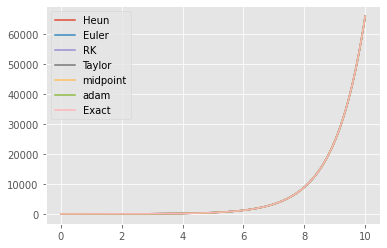

In [119]:
plt.plot(heun_1[0],heun_1[1])
plt.plot(euler_1[0],euler_1[1])
plt.plot(RK_1[0],RK_1[1])
plt.plot(Taylor_1[0],Taylor_1[1])
plt.plot(mid_1[0],mid_1[1])
plt.plot(adam_1[0],adam_1[1])
plt.plot(x,y)
plt.legend(['Heun','Euler','RK','Taylor','midpoint','adam','Exact'])